## Libraries

##### Import Common Library for Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Import Machine Learning Library

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error ,root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

## Dataset

##### Load Dataset

Source: `Customer lifetime value`

- Define 2 variables filled by Original dataset for `Basic Comparison Purpose`
- Show the dataset's shape

In [3]:
raw = pd.read_csv('data_customer_lifetime_value.csv')
data = raw
data.shape

(5669, 11)

##### Show Dataset - First 5 Rows

- First look of dataset

In [4]:
data.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## Disclaimer

As this state: 
- We will refer dataset's name `Customer lifetime value` as `CLV data` for Context Analytics
- We will refer this `dataset` as `data` for both Marking down & Pandas DataFrame

## Background

### Context

Customer Lifetime Value (CLV) is a critical metric for businesses, which representing the customers’s value over the company. Machine learning analytics offers powerful tools to predict CLV accurately.

### Bussiness Problem

Develop a machine learning model to predict Customer Lifetime Value (CLV) based on customer data. Identify key factors influencing CLV to build a predictive model for future CLV estimation.

### Goal

1. `Build` machine learning model for CLV prediction.
2. Identify influential `features`.
3. `Optimize model` performance through Cross Validation and hyperparameter tuning.
4. `Evaluate` model accuracy using metrics MAPE (Mean Absolute Percentage Error)
5. `Deploy` the model for CLV predictions and monitor performance.
6. Provide actionable `insights` for marketing and customer management strategies.

## Data Understanding

`Each Row` Represents `a customer's profile` about their interactions with Insurance Company

-	Vehicle Class
-	Coverage
-	Renew Offer Type
-	Employment Status
-	Marital Status
-	Education
-	Number of Policies
-	Monthly Premium Auto
-	Total Claim Amount
-	Income
-	Customer Lifetime Value

## Cleansing

##### Data Info Check

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Insights:

- There's `11 columns` in this data.
- There's only 2 data types. `Object and Float`
- Object data type used by 6 columns
- Float data type used by 5 columns
- There's `no null value`

##### Drop Duplicated data

In [6]:
data.duplicated().sum()

618

In [7]:
data = data.drop_duplicates()
print(f'Before {raw.shape}\nAfter {data.shape}')

Before (5669, 11)
After (5051, 11)


##### View Column's Info

In [8]:
data.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [378]:
pd.set_option('display.max_colwidth', None)

datainfo = pd.DataFrame({
    'Features': data.columns.values,
    'Data Type': data.dtypes.values,
    'Null_value': [data[col].isna().sum() for col in data.columns],
    'Null Value (%)': pd.Series(np.round(data.isna().mean().values * 100, 2)).apply(lambda x: str(x)+' %'),
    'Unique Value': data.nunique().values,
    'Unique Sample': [data[col].unique() for col in data.columns]
}).round(3)

display(data.shape,datainfo)

(5051, 11)

,Features,Data Type,Null_value,Null Value (%),Unique Value,Unique Sample
0,Vehicle Class,object,0,0.0 %,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,object,0,0.0 %,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,0.0 %,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,0.0 %,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,object,0,0.0 %,3,"[Divorced, Married, Single]"
5,Education,object,0,0.0 %,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,float64,0,0.0 %,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,0.0 %,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,float64,0,0.0 %,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,float64,0,0.0 %,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


#### Handling outliers

In [379]:
def iqr_outliers_detector(df, col,  threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outlier= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outlier, lower_bound, upper_bound 

##### Handling Target Outlier : `Customer Lifetime Value`

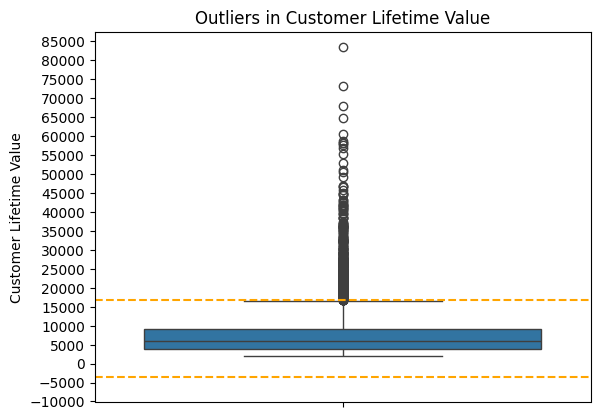

In [380]:
col = 'Customer Lifetime Value'
CLV_outlier, lowbound, upbound = iqr_outliers_detector(data, col)

sns.boxplot(data[col])
plt.yticks(range(-10000,90000, 5000))
plt.axhline(y=lowbound, color='orange', linestyle = '--')
plt.axhline(y=upbound, color='orange', linestyle = '--')
plt.title(f'Outliers in {col}')
plt.show()

In [381]:
print('Total Ouliers Found:',len(CLV_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

print(f'Before {data.shape}')
data_f0 = data # keep data without dropping Target Outliers
data_t0 = data.drop(CLV_outlier.index)
print(f'After {data_t0.shape}')

Total Ouliers Found: 449
With Lower -3631.744438749999 and Upper 16624.75007525
Before (5051, 11)
After (4602, 11)


##### Handling Feature Outlier : `Monthly Premium Auto`

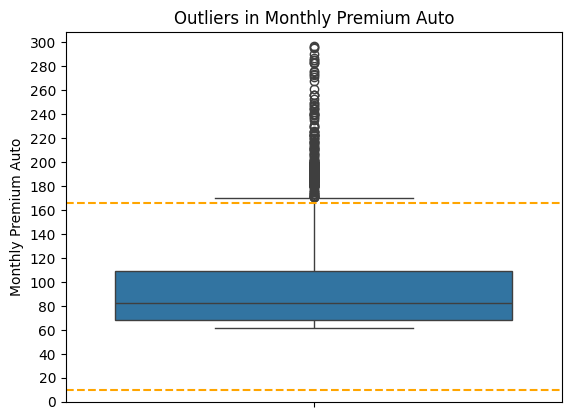

In [382]:
col = 'Monthly Premium Auto'
MPA_outlier, lowbound, upbound = iqr_outliers_detector(data_t0, col)

sns.boxplot(data[col])
plt.yticks(range(0,301, 20))
plt.axhline(y=lowbound, color='orange', linestyle = '--')
plt.axhline(y=upbound, color='orange', linestyle = '--')
plt.title(f'Outliers in {col}')
plt.show()

In [383]:
print('Total Outliers Found:',len(MPA_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

print(f'Before {data_t0.shape}')
data_f0 = data_f0.drop(MPA_outlier.index)
data = data_t0.drop(MPA_outlier.index)
print(f'After {data.shape}')

Total Outliers Found: 175
With Lower 9.5 and Upper 165.5
Before (5051, 11)
After (4427, 11)


##### Handling Feature Outlier : `Total Claim Amount`

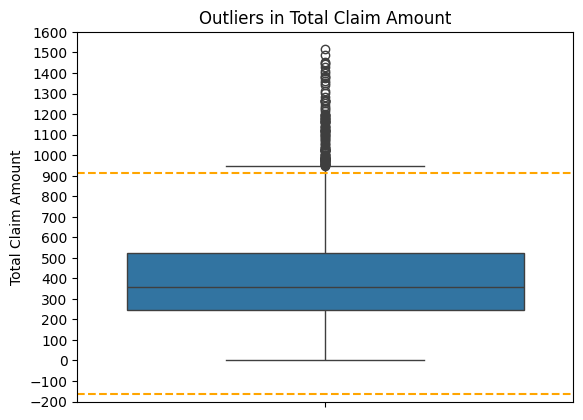

In [384]:
col = 'Total Claim Amount'
TCA_outlier, lowbound, upbound = iqr_outliers_detector(data_tf0, col)

sns.boxplot(data[col])
plt.yticks(range(-200, 1601, 100))
plt.axhline(y=lowbound, color='orange', linestyle = '--')
plt.axhline(y=upbound, color='orange', linestyle = '--')
plt.title(f'Outliers in {col}')
plt.show()

In [385]:
print('Total Outliers Found:',len(TCA_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

print(f'Before {data.shape}')
data_f0 = data_f0.drop(TCA_outlier.index)
data = data.drop(TCA_outlier.index)
print(f'After {data.shape}')

Total Outliers Found: 20
With Lower -162.223334375 and Upper 915.254000625
Before (4427, 11)
After (4407, 11)


##### Handling Feature Outlier : `Income`

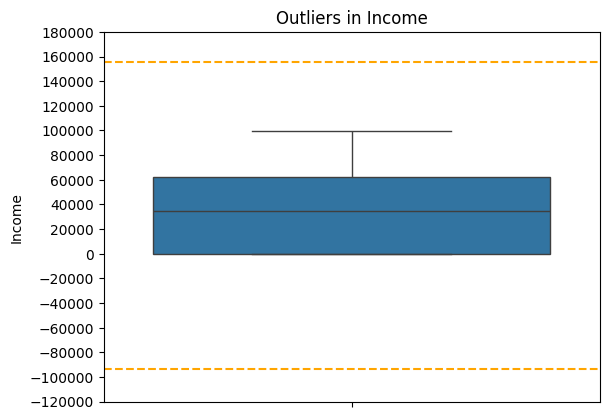

In [386]:
col = 'Income'
Income_outlier, lowbound, upbound = iqr_outliers_detector(data, col)

sns.boxplot(data[col])
plt.yticks(range(-120000, 180001, 20000))
plt.axhline(y=lowbound, color='orange', linestyle = '--')
plt.axhline(y=upbound, color='orange', linestyle = '--')
plt.title(f'Outliers in {col}')
plt.show()

In [387]:
# Theres no Outliers to drop

print('Total Outliers found:',len(Income_outlier))
print(f'With Lower-Bound {lowbound} and Upper-Bound {upbound}')

print(f'Before {data.shape}')
data_f0 = data_f0.drop(Income_outlier.index)
data = data.drop(Income_outlier.index)
print(f'After {data.shape}')

Total Outliers found: 0
With Lower-Bound -93480.0 and Upper-Bound 155800.0
Before (4407, 11)
After (4407, 11)


## Feature Engineering

In [388]:
data.columns.values

array(['Vehicle Class', 'Coverage', 'Renew Offer Type',
       'EmploymentStatus', 'Marital Status', 'Education',
       'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value'], dtype=object)

In [389]:
data_t0.corr(method='spearman', numeric_only=True)['Customer Lifetime Value'].sort_values(ascending=False)

Customer Lifetime Value    1.000000
Number of Policies         0.560002
Monthly Premium Auto       0.476259
Total Claim Amount         0.189964
Income                     0.066145
Name: Customer Lifetime Value, dtype: float64

##### Find Ordinal Order for `Vehicle Class`

In [390]:
vehicle_level_assumption = data_t0.groupby(['Vehicle Class'])[['Income']].median().sort_values('Income',ascending=False).index.values
vehicle_level_assumption

array(['Luxury Car', 'Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV',
       'Sports Car'], dtype=object)

In [391]:
temp = data[['Customer Lifetime Value','Vehicle Class']]
ord_temp = OrdinalEncoder(categories= [vehicle_level_assumption])
temp['Vehicle Class'] = ord_temp.fit_transform(temp[['Vehicle Class']])

temp.corr(method='spearman')['Customer Lifetime Value']

Customer Lifetime Value    1.000000
Vehicle Class              0.271841
Name: Customer Lifetime Value, dtype: float64

##### Find Ordinal Order for `Coverage`

In [392]:
coverage_level_assumption = data_t0.groupby(['Coverage'])[['Income']].median().sort_values('Income',ascending=False).index.values
coverage_level_assumption

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [393]:
temp = data[['Customer Lifetime Value','Coverage']]
ord_temp = OrdinalEncoder(categories= [coverage_level_assumption])
temp['Coverage'] = ord_temp.fit_transform(temp[['Coverage']])

temp.corr(method='spearman')['Customer Lifetime Value']

Customer Lifetime Value    1.000000
Coverage                   0.255996
Name: Customer Lifetime Value, dtype: float64

##### Feature Selection

In [394]:
# Feature Selection for transforming

num = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']
bin = ['EmploymentStatus']
ord = ['Coverage', 'Education', 'Vehicle Class']
ohe = ['Renew Offer Type', 'Marital Status']

##### Defining Features and Target from data

In [395]:
# with no Outliers in Target and Feature

x = data.drop(columns= ['Customer Lifetime Value'])
y = data['Customer Lifetime Value']

In [396]:
# with no Outliers in Target
x_t0 = data_t0.drop(columns= ['Customer Lifetime Value'])
y_t0 = data_t0['Customer Lifetime Value']

In [397]:
# with no Outliers in Feature
x_f0 = data_f0.drop(columns= ['Customer Lifetime Value'])
y_f0 = data_f0['Customer Lifetime Value']

##### Data Splitting

split the data into `train set` for training and validating model and `test set` for testing the model with 8:2 ratio
- Using train_set_split from sklearn.model_selection for splitting data

In [398]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    random_state=2024,
    test_size=0.2
)

In [399]:
xtrain_t0, xtest_t0, ytrain_t0, ytest_t0 = train_test_split(
    x_t0,
    y_t0,
    random_state=2024,
    test_size=0.2
)

In [400]:
xtrain_f0, xtest_f0, ytrain_f0, ytest_f0 = train_test_split(
    x_f0,
    y_f0,
    random_state=2024,
    test_size=0.2
)

#####  Preprocessing

Define Preprocessing for `Selected Features` before running by Machine Learning Models

In [401]:
coverage_level = [coverage_level_assumption]
education_level = [['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']]
vehicle_class_level = [vehicle_level_assumption]

preproc = ColumnTransformer([
        ('num', StandardScaler(), num),
        ('bin', BinaryEncoder(), bin),
        ('ohe', OneHotEncoder(drop='first'), ohe),
        ('ord_coverage', OrdinalEncoder(categories= coverage_level), [ord[0]]),
        ('ord_education', OrdinalEncoder(categories= education_level), [ord[1]]),
        ('ord_vehicle', OrdinalEncoder(categories= vehicle_class_level), [ord[2]])
], remainder='passthrough')

processed = preproc.fit_transform(x)
pd.DataFrame(processed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.168308,0.759359,-0.844736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
1,-1.087801,-1.196032,0.227590,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,6.0
2,-1.087801,-0.585260,-0.529361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0
3,1.334694,0.696544,-0.646609,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0
4,-1.087801,-0.163462,-0.610240,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


## Model Benchmarking

##### Define Models

In [402]:
# Define the regression models from sklearn

linreg = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svm = SVR()
rf = RandomForestRegressor()
gboost = GradientBoostingRegressor()
adaboost = AdaBoostRegressor()
lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()

##### Cross Validation

Perform Cross Validation between models to find best 2 models by MAPE Scoring

In [403]:
models = [linreg, dt, knn, svm, rf, gboost, adaboost, lasso, ridge, elasticnet]
score, score_t0, score_f0 = [], [], []
mean, mean_t0, mean_f0 = [], [], []
std, std_t0, std_f0 = [], [], []

for i in models:
  model = Pipeline([
      ('Pre', preproc),
      ('Model', i)
  ])

  model_cv = cross_val_score(model, xtrain, ytrain, cv=5, scoring= 'neg_mean_absolute_percentage_error')
  score.append(model_cv)
  mean.append(model_cv.mean()*100)
  std.append(model_cv.std())

  model_cv_t0 = cross_val_score(model, xtrain_t0, ytrain_t0, cv=5, scoring= 'neg_mean_absolute_percentage_error')
  score_t0.append(model_cv_t0)
  mean_t0.append(model_cv_t0.mean()*100)
  std_t0.append(model_cv_t0.std())

  model_cv_f0 = cross_val_score(model, xtrain_f0, ytrain_f0, cv=5, scoring= 'neg_mean_absolute_percentage_error')
  score_f0.append(model_cv_f0)
  mean_f0.append(model_cv_f0.mean()*100)
  std_f0.append(model_cv_f0.std())

df_model = pd.DataFrame({
   'Model' : ['LinReg', 'DT', 'KNN', 'SVM', 'RForest', 'GradBoost', 'AdaBoost', 'Lasso', 'Ridge', 'ElasticNet'],
   'Mean' : mean,
   'Std' : std,
   'Mean_noOutlierTarget' : mean_t0,
   'Std_noOutlierTarget' : std_t0,
   'Mean_noOutlierFeature' : mean_f0,
   'Std_noOutlierFeature' : std_f0
}).sort_values('Mean', ascending = False)

df_model

,Model,Mean,Std,Mean_noOutlierTarget,Std_noOutlierTarget,Mean_noOutlierFeature,Std_noOutlierFeature
4,RForest,-4.619962,0.003597,-4.365981,0.000418,-12.847580,0.007101
5,GradBoost,-5.126199,0.001899,-4.902222,0.000903,-15.257839,0.009038
1,DT,-5.670040,0.006036,-5.587612,0.003435,-15.071063,0.010821
6,AdaBoost,-11.437911,0.003338,-15.817305,0.003547,-69.700702,0.103728
2,KNN,-16.244738,0.004756,-15.136390,0.006023,-28.754719,0.017391
0,LinReg,-38.501185,0.007980,-37.391708,0.006160,-59.939772,0.033241
8,Ridge,-38.502817,0.007985,-37.393909,0.006167,-59.937926,0.033252
7,Lasso,-38.504909,0.008051,-37.398654,0.006195,-59.926392,0.033256
9,ElasticNet,-41.003502,0.010517,-40.167481,0.009123,-63.609763,0.030185
3,SVM,-42.687359,0.012948,-43.133060,0.015815,-48.772407,0.012718


In [404]:
xtrain = xtrain_t0
ytrain = ytrain_t0
xtest = xtest_t0
ytest = ytest_t0

xtrain.shape, ytrain.shape

((3525, 10), (3525,))

In [405]:
model = Pipeline([
    ('Pre', preproc),
    ('Model', rf)
])
model.fit(xtrain, ytrain)
y_dt_pred = model.predict(xtest)
rf_mape = mean_absolute_percentage_error(ytest, y_dt_pred)
print(f'Test Mean Absolute Percentage Error: {round(rf_mape*100, 3)}%')

Test Mean Absolute Percentage Error: 4.66%


## First Model - Random Forest Regressor

##### Hyperparameter tuning - Random Forest Regressor

In [410]:
# Define parameter grid for Random Forest Regressor
rf_params = {
    'Model__n_estimators': [50,100,200],
    'Model__max_depth': [3,5,10,None],
    'Model__min_samples_split': [2,4,6],
    'Model__min_samples_leaf': [1,3,5,10,20],
    'Model__max_features': [None, 0.5, 1, 'sqrt', 'log2'],
    'Model__bootstrap': [True, False]
}

# Create full pipeline including preprocessing and Random Forest
model = Pipeline([
    ('Pre', preproc),
    ('Model', rf)
])

# Initialize grid search with cross-validation
rf_random_search = RandomizedSearchCV(
    estimator= model,
    param_distributions= rf_params,
    n_iter= 200,
    cv=5,
    scoring= 'neg_mean_absolute_percentage_error',
    verbose=True
)

# Perform grid search on the training data
rf_random_search.fit(xtrain, ytrain)

# Get the best hyperparameters
print('Best parameters for RandomForestRegressor: ', rf_random_search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for RandomForestRegressor:  {'Model__n_estimators': 200, 'Model__min_samples_split': 6, 'Model__min_samples_leaf': 5, 'Model__max_features': None, 'Model__max_depth': None, 'Model__bootstrap': True}


In [425]:
dict(rf_random_search.best_params_)

{'Model__n_estimators': 200,
 'Model__min_samples_split': 6,
 'Model__min_samples_leaf': 5,
 'Model__max_features': None,
 'Model__max_depth': None,
 'Model__bootstrap': True}

##### Testing `Random Forest Regressor` with `Best Parameter`

In [411]:
# Train final model with best hyperparameters
model = model.set_params(**rf_random_search.best_params_)
model.fit(xtrain, ytrain)

# Evaluate final model on test set
y_dt_pred = model.predict(xtest)
rf_mape = mean_absolute_percentage_error(ytest, y_dt_pred)
print(f'Mean Absolute Percentage Error - Test: {round(rf_mape*100,3)}%')

Mean Absolute Percentage Error - Test: 4.394%


## Second Model - Gradient Boosting Regressor

##### Hyperparameter tuning - Gradient Boosting Regressor

In [419]:
# Define parameter grid for GradientBoostingRegressor
gb_params = {
    'Model__loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'Model__n_estimators': range(10, 100, 10),
    'Model__learning_rate': [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'Model__max_depth': [3, 4, 5, 6, 7],
    'Model__min_samples_split': range(2, 20, 2),
    'Model__min_samples_leaf': range(1, 10, 1),
    'Model__max_features': ['auto', 'sqrt', 'log2']
}

# Create full pipeline including preprocessing and GradientBoostingRegressor
model = Pipeline([
    ('Prep', preproc),
    ('Model', gboost)
])

# Initialize grid search with cross-validation
gb_random_search = RandomizedSearchCV(
    estimator= model,
    param_distributions= gb_params,
    n_iter= 200,
    cv=5,
    scoring= 'neg_mean_absolute_percentage_error',
    verbose=True
)

# Perform grid search on the training data
gb_random_search.fit(xtrain, ytrain)

# Get the best hyperparameters
print('Best parameters for GradientBoostingRegressor: ', gb_random_search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for GradientBoostingRegressor:  {'Model__n_estimators': 90, 'Model__min_samples_split': 6, 'Model__min_samples_leaf': 3, 'Model__max_features': 'sqrt', 'Model__max_depth': 7, 'Model__loss': 'huber', 'Model__learning_rate': 0.05}


In [424]:
dict(gb_random_search.best_params_)

{'Model__n_estimators': 90,
 'Model__min_samples_split': 6,
 'Model__min_samples_leaf': 3,
 'Model__max_features': 'sqrt',
 'Model__max_depth': 7,
 'Model__loss': 'huber',
 'Model__learning_rate': 0.05}

##### Testing `Gradient Boosting Regressor` with `Best Parameter`

In [420]:
# Train final model with best hyperparameters
model = model.set_params(**gb_random_search.best_params_)
model.fit(xtrain, ytrain)

# Evaluate final model on test set
y_dt_pred = model.predict(xtest)
gb_mape = mean_absolute_percentage_error(ytest, y_dt_pred)
print(f'Mean Absolute Percentage Error - Test: {round(gb_mape*100,3)}%')

Mean Absolute Percentage Error - Test: 5.22%


## Third Model - Decision Tree Regressor

##### Hyperparameter tuning - Decision Tree Regressor

In [426]:
# Define parameter grid for Decision Tree Regressor
dt_params = {
    'Model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'Model__splitter': ['best', 'random'],
    'Model__max_depth': [3, 4, 5, 6, 7],
    'Model__min_samples_split': range(2, 20, 2),
    'Model__min_samples_leaf': range(1, 10, 1),
    'Model__max_features': ['auto', 'sqrt', 'log2']
}

# Create full pipeline including preprocessing and Decision Tree Regressor
model = Pipeline([
    ('Prep', preproc),
    ('Model', dt)
])

# Initialize grid search with cross-validation
dt_random_search = RandomizedSearchCV(
    estimator= model,
    param_distributions= dt_params,
    n_iter= 200,
    cv=5,
    scoring= 'neg_mean_absolute_percentage_error',
    verbose=True
)

# Perform grid search on the training data
dt_random_search.fit(xtrain, ytrain)

# Get the best hyperparameters
print('Best parameters for GradientBoostingRegressor: ', dt_random_search.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters for GradientBoostingRegressor:  {'Model__splitter': 'best', 'Model__min_samples_split': 6, 'Model__min_samples_leaf': 7, 'Model__max_features': 'sqrt', 'Model__max_depth': 7, 'Model__criterion': 'squared_error'}


In [427]:
dict(dt_random_search.best_params_)

{'Model__splitter': 'best',
 'Model__min_samples_split': 6,
 'Model__min_samples_leaf': 7,
 'Model__max_features': 'sqrt',
 'Model__max_depth': 7,
 'Model__criterion': 'squared_error'}

##### Testing `Decision Tree Regressor` with `Best Parameter`

In [428]:
# Train final model with best hyperparameters
model = model.set_params(**dt_random_search.best_params_)
model.fit(xtrain, ytrain)

# Evaluate final model on test set
y_dt_pred = model.predict(xtest)
dt_mape = mean_absolute_percentage_error(ytest, y_dt_pred)
print(f'Mean Absolute Percentage Error - Test: {round(dt_mape*100,3)}%')

Mean Absolute Percentage Error - Test: 19.393%


## Conclution

- Best Model Is Random Forest Regression with MAPE Score: 4,39%
- Model Machine Learning is more than good enough to predict CLV Data from New Customer

Recommendation:
- This Machine Learning Model could be more accurate by another setting of Feature Selection and more deep iteration of Hyperparameter Tuning